# SALES ANALYSIS

## Introduction:

##### Sales analytics plays a crucial role in helping businesses extract valuable insights from their sales data to optimize performance, enhance decision-making, and drive revenue growth. As a data scientist, expertise in data analysis, statistical modeling, and machine learning can be instrumental in uncovering patterns, trends, and opportunities hidden within sales data.



### Step 1. Import the necessary libraries

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt 

### Step 2. Import the dataset

In [44]:
# we have data from 12 months in 2019 fro sales company
all_data=pd.read_csv('all_data.csv')

### Step 3. See the first 10 rows

In [45]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


### Step 3. clean the data from NAN and duplicated rows 

In [46]:
all_data.dropna(how='all',inplace=True)
# no missing value 
pd.isnull(all_data).sum() 
# Drop the duplicated Data 
all_data=all_data.drop_duplicates()
#drop row how has a string value 
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

### Step 4.Reset the index  

In [47]:
all_data=all_data.reset_index(drop=True)

### Step 5.  Check out the type of the columns

In [48]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Step 6.  Make the columns at the correct type

In [49]:
#order date to datetime
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
#Quantity orederd and Price Each to int 
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## Question 1: What was the best month for sales? How much was earned that month? 

### Step 1.  Create a Month Column

In [50]:
import datetime as dt 
all_data['Month']=all_data['Order Date'].dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### Step 2.  Create a sales column

In [51]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Step 3.  Best Month of sale


In [52]:
#grouping the data by months
months_sale=all_data.groupby('Month').sum()
months_sale.tail(1)

C:\Users\zakaria\AppData\Local\Temp\ipykernel_11776\789236657.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  months_sale=all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
12,28074,4583267.77,4608295.7


### Step 3.  How much was earned 


In [53]:
months_sale['Sales'].sort_values(ascending=False).head(1)

Month
12    4608295.7
Name: Sales, dtype: float64

### Step 4.  Plot the results 


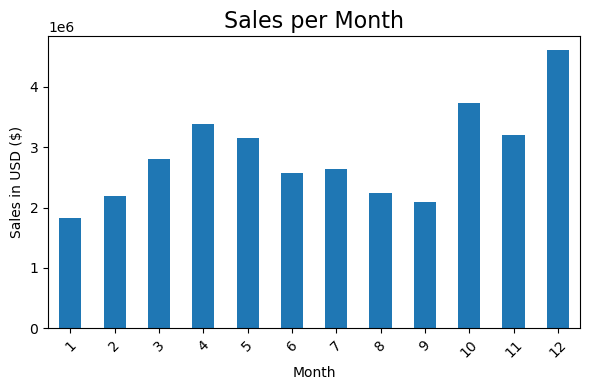

In [63]:
plt.figure(figsize=(6, 4))
months_sale['Sales'].plot(kind='bar')

plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.title('Sales per Month', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 2: What city sold the most product?

### Step 1.  Add a city column 


In [121]:
all_data['City']=all_data['Purchase Address'].apply(lambda x : x.split(',')[1])

### Step 2.  Group the data by the Cities 


In [126]:
#group by cities 
cities_sales=all_data.groupby('City').sum()
#sort the data by the most sold city 
cities_sales.sort_values('Sales',ascending=False).head(1)

C:\Users\zakaria\AppData\Local\Temp\ipykernel_11776\1802564497.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cities_sales=all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco,50169,8204001.38,314949,8254743.55


### Step 3.  Create a histogram 


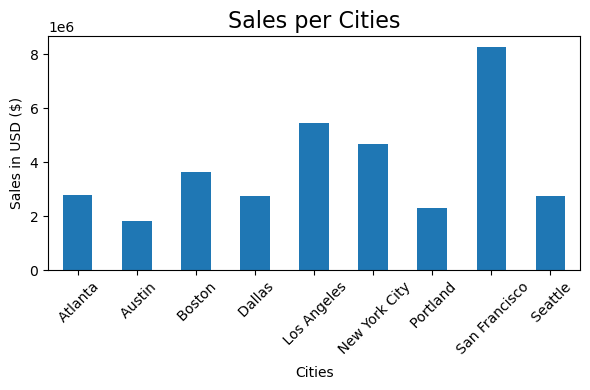

In [127]:
plt.figure(figsize=(6, 4))
cities_sales['Sales'].plot(kind='bar')

plt.xlabel('Cities')
plt.ylabel('Sales in USD ($)')
plt.title('Sales per Cities', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#San Francisco had the most sales 

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

### Step 1.  Create a column time  


In [131]:
#adding a hours columns
all_data['Hours']=all_data['Order Date'].dt.hour
#Groupind our data by hours 
Hours_salaes=all_data.groupby('Hours').sum()

### Step 2.  Whitch Hour has the most sale


In [147]:
Hours_salaes.sort_values('Sales',ascending=False).head(1) # 19 is the most sales hour

,Quantity Ordered,Price Each,Month,Sales
Hours,,,,
19,14451,2397620.91,91254,2411971.14


### Step 3.  Plot the result


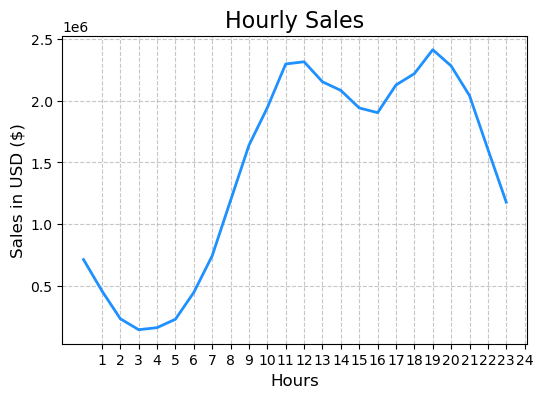

In [146]:
plt.figure(figsize=(6, 4))  # Adjust the figure size to your liking

# Use a pleasing color for the line plot
line_color = 'dodgerblue'

plt.plot(Hours_salaes['Sales'], color=line_color, linewidth=2)

plt.xlabel('Hours', fontsize=12)
plt.ylabel('Sales in USD ($)', fontsize=12)
plt.title('Hourly Sales', fontsize=16)
plt.xticks(range(1, 25), fontsize=10)  # Set the x-axis ticks to match the hours
# Add grid for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)


## Question 4: What was the quantity of the most expensive item ordered??


In [171]:
#the most expesive item
all_data.sort_values('Price Each',ascending=False).head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
146354,288494,Macbook Pro Laptop,1,1700.0,2019-11-24 11:38:00,"615 Church St, San Francisco, CA 94016",11,1700.0,San Francisco,11


In [177]:
#the most quantity item ordered 
all_data.sort_values(by='Quantity Ordered',ascending=False).head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
92295,211097,AAA Batteries (4-pack),9,2.99,2019-06-23 08:29:00,"338 Hickory St, Los Angeles, CA 90001",6,26.91,Los Angeles,8
